In [ ]:
 from google.colab import drive
 drive.mount('/content/gdrive')
 %cd'gdrive/My Drive/Colab Notebooks/Thesis/LogisticRegression'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/Colab Notebooks/Thesis/LogisticRegression'
/content/gdrive/My Drive/Colab Notebooks/Thesis/LogisticRegression


In [ ]:
import pandas as pd
data=pd.read_csv('RegionalDengueCombinedData.csv')
data.head()

,Unnamed: 0,PatientId,Sex,NAge,Hb,HCT,Platelets,WBC,Lymphocytes,Neutrophils,Monocytes,Decision
0,102,1248642.0,1,1.0,15.5,47.0,115000,9800.0,50.0,45.0,3.0,0.0
1,155,1253183.0,0,20.0,12.8,39.0,193000,3700.0,17.0,77.0,5.0,0.0
2,47,120811.0,1,2.0,11.4,34.0,165000,7500.0,18.0,75.0,1.0,0.0
3,14,NaN,1,3.0,10.5,37.2,29500,7500.0,16.0,78.0,5.0,1.0
4,19,123442.0,1,7.0,13.7,40.4,40000,22900.0,64.0,30.0,5.0,1.0


https://realpython.com/logistic-regression-python/

https://datatofish.com/logistic-regression-python/

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score


In [ ]:
X1=data[['NAge','Sex','Hb','HCT','WBC','Neutrophils','Monocytes','Lymphocytes']]
y1=data['Decision']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.25,random_state=0)

In [ ]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

Confusion Matrix

Predicted  0.0  1.0
Actual             
0.0         35    0
1.0          7    1


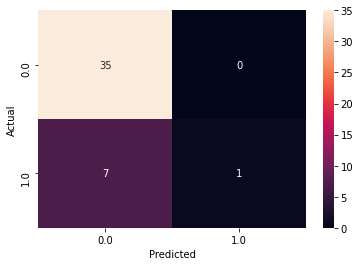

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8372093023255814


In [ ]:
print ('Testing Inputs')
print (X_test) #test dataset
print ('Predicted: ',y_pred) #predicted values

Testing Inputs
     NAge  Sex    Hb   HCT      WBC  Neutrophils  Monocytes  Lymphocytes
152   9.0    1  13.6  42.0   4500.0         49.0        4.0         46.0
56   21.0    1  15.0  46.0   4500.0         75.0        4.0         20.0
123   3.0    1  12.2  36.0   7900.0         24.0        3.0         68.0
60    8.0    0  13.1  40.0   5000.0         72.0        4.0         22.0
100  26.0    0  12.2  37.0   4200.0         64.0        3.0         32.0
51   27.0    1  14.9  46.0   5400.0         69.0        4.0         26.0
7     1.0    0  11.3  37.0  10500.0         17.0        4.0         78.0
5     9.0    1  14.9  43.7  55200.0         81.0        3.0         15.0
86    7.0    1  13.9  39.0   4500.0         55.0        9.0         36.0
135  32.0    0  10.7  33.0   3800.0         74.0        3.0         22.0
54   31.0    1  14.3  44.0   8200.0         76.0        2.0         20.0
94   23.0    2  13.9  43.0  19300.0         34.0        5.0         60.0
158  23.0    0  11.7  36.0   7200.0 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        35
         1.0       1.00      0.12      0.22         8

    accuracy                           0.84        43
   macro avg       0.92      0.56      0.57        43
weighted avg       0.86      0.84      0.78        43




<b>PRECISION</b>

<p>Precision is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”</p>

<b>RECALL</b>

<p>Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”</p>

<b>f1 SCORE</b>

<p>The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.</p>

<b>SUPPORT</b>

<p>Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.</p>
